## Getting set up

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, HoverTool, PrintfTickFormatter, FixedTicker
from bokeh.plotting import figure, show
import bokeh.plotting as bp

%matplotlib inline

# just a shortcut for file paths
fig_dir = '../figs/'
data_dir = '../data/'

# Define function to allow us to display charts in an iframe
def show_iframe(url, iheight=400, iwidth=1000):
    display_string = '<iframe src={url} width={w} height={h}></iframe>'.format(url=url, w=iwidth, h=iheight)
    print(display_string)
    return HTML(display_string)

In [2]:
# importing JP Morgan Chase Institute csv files from data_dir

# path to NYC-specific data
path = data_dir + 'lcc_nymetrodata.csv'

# path to national dataset
path2 = data_dir + 'lcc_fulldata.csv'

## Creating a dataframe

In [3]:
nyc = pd.read_csv(path)

In [4]:
nyc.head()

,periodid,area_name,dimname,category,growth_rate,spend_share,growth_contribution
0,201310,"New York, NY - Metro Area",age,<25,0.2995,0.0909,0.0235
1,201310,"New York, NY - Metro Area",age,25-34,0.1546,0.1414,0.0212
2,201310,"New York, NY - Metro Area",age,35-44,0.1128,0.1947,0.0221
3,201310,"New York, NY - Metro Area",age,45-54,0.0896,0.2280,0.0210
4,201310,"New York, NY - Metro Area",age,55-64,0.0959,0.1710,0.0168


In [5]:
nyc.dtypes

periodid                 int64
area_name               object
dimname                 object
category                object
growth_rate            float64
spend_share            float64
growth_contribution    float64
dtype: object

In order to do a time series, we need to make use of the YYYY-MM in the 'periodid' column. Below, we'll turn the data for this column into a string and then convert it to datetime

In [6]:
# converting the 'periodid' column to datetime

nyc['periodid'] = pd.to_datetime(nyc['periodid'].astype(str), format = '%Y%m')

In [7]:
# creating a month and year column

nyc['month'] = nyc.periodid.dt.month
nyc['year'] = nyc.periodid.dt.year

In [8]:
# making the 'periodid' the index

nyc.set_index('periodid', inplace=True)

In [9]:
# creating a string version of year-month

nyc['month'] = nyc['month'].astype(str)
nyc['year'] = nyc['year'].astype(str)
nyc['year-month'] = nyc['year'] + "-" + nyc['month']

In [10]:
nyc.head()

,area_name,dimname,category,growth_rate,spend_share,growth_contribution,month,year,year-month
periodid,,,,,,,,,
2013-10-01,"New York, NY - Metro Area",age,<25,0.2995,0.0909,0.0235,10,2013,2013-10
2013-10-01,"New York, NY - Metro Area",age,25-34,0.1546,0.1414,0.0212,10,2013,2013-10
2013-10-01,"New York, NY - Metro Area",age,35-44,0.1128,0.1947,0.0221,10,2013,2013-10
2013-10-01,"New York, NY - Metro Area",age,45-54,0.0896,0.2280,0.0210,10,2013,2013-10
2013-10-01,"New York, NY - Metro Area",age,55-64,0.0959,0.1710,0.0168,10,2013,2013-10


In [11]:
# checking what the unique values under 'category' are

nyc['category'].unique()

array(['<25', '25-34', '35-44', '45-54', '55-64', '65+', '<21', '21-40',
       '41-60', '61-80', '81-100', 'Different Region',
       'Same Neighborhood', 'Same Region', 'LARGE', 'MEDIUM', 'SMALL',
       'Durables', 'Fuel', 'Nondurables', 'Other Services', 'Restaurants',
       nan], dtype=object)

In [12]:
# checking the unique value under 'dimname' are

nyc['dimname'].unique()

array(['age', 'income', 'location', 'bizsize', 'product', 'Total'],
      dtype=object)

In [13]:
# taking a look at the df for only under 25 year olds

nyc[nyc['category']=='<25']

,area_name,dimname,category,growth_rate,spend_share,growth_contribution,month,year,year-month
periodid,,,,,,,,,
2013-10-01,"New York, NY - Metro Area",age,<25,0.2995,0.0909,0.0235,10,2013,2013-10
2013-11-01,"New York, NY - Metro Area",age,<25,0.2438,0.0906,0.0192,11,2013,2013-11
2013-12-01,"New York, NY - Metro Area",age,<25,0.1670,0.0906,0.0131,12,2013,2013-12
2014-01-01,"New York, NY - Metro Area",age,<25,0.2137,0.0758,0.0136,1,2014,2014-1
2014-02-01,"New York, NY - Metro Area",age,<25,0.2638,0.0703,0.0153,2,2014,2014-2
2014-03-01,"New York, NY - Metro Area",age,<25,0.2003,0.0726,0.0125,3,2014,2014-3
2014-04-01,"New York, NY - Metro Area",age,<25,0.2036,0.0692,0.0123,4,2014,2014-4
2014-05-01,"New York, NY - Metro Area",age,<25,0.2047,0.0685,0.0123,5,2014,2014-5
2014-06-01,"New York, NY - Metro Area",age,<25,0.1422,0.0648,0.0083,6,2014,2014-6


In [14]:
# taking a look at the millennials -- folks under 35

nyc[(nyc.category == '<25') | (nyc.category == '25-34')] 

,area_name,dimname,category,growth_rate,spend_share,growth_contribution,month,year,year-month
periodid,,,,,,,,,
2013-10-01,"New York, NY - Metro Area",age,<25,0.2995,0.0909,0.0235,10,2013,2013-10
2013-10-01,"New York, NY - Metro Area",age,25-34,0.1546,0.1414,0.0212,10,2013,2013-10
2013-11-01,"New York, NY - Metro Area",age,<25,0.2438,0.0906,0.0192,11,2013,2013-11
2013-11-01,"New York, NY - Metro Area",age,25-34,0.1281,0.1412,0.0173,11,2013,2013-11
2013-12-01,"New York, NY - Metro Area",age,<25,0.1670,0.0906,0.0131,12,2013,2013-12
2013-12-01,"New York, NY - Metro Area",age,25-34,0.0413,0.1361,0.0055,12,2013,2013-12
2014-01-01,"New York, NY - Metro Area",age,<25,0.2137,0.0758,0.0136,1,2014,2014-1
2014-01-01,"New York, NY - Metro Area",age,25-34,0.0833,0.1454,0.0114,1,2014,2014-1
2014-02-01,"New York, NY - Metro Area",age,<25,0.2638,0.0703,0.0153,2,2014,2014-2


In [15]:
# putting the nyc millennials in one df
nyc_millennials = nyc[(nyc.category == '<25') | (nyc.category == '25-34')]

# checking to see what the mean figures are from Oct 2013 through Dec 2017
nyc_millennials.groupby('category').agg(np.mean)

,growth_rate,spend_share,growth_contribution
category,,,
25-34,0.060359,0.157080,0.009055
<25,0.179349,0.066322,0.010275


In [16]:
# while we're at it, we'll bucket all the age groups into a df
nyc_age = nyc[nyc['dimname'] == 'age']

# and then group the age groups
age_group = nyc_age.groupby('category')

In [175]:
age_group.agg(np.max)

,area_name,dimname,growth_rate,spend_share,growth_contribution,month,year,year-month
category,,,,,,,,
25-34,"New York, NY - Metro Area",age,0.1546,0.1783,0.0212,9,2017,2017-9
35-44,"New York, NY - Metro Area",age,0.1128,0.2018,0.0221,9,2017,2017-9
45-54,"New York, NY - Metro Area",age,0.0896,0.2418,0.0210,9,2017,2017-9
55-64,"New York, NY - Metro Area",age,0.0959,0.1948,0.0168,9,2017,2017-9
65+,"New York, NY - Metro Area",age,0.0875,0.1942,0.0157,9,2017,2017-9
<25,"New York, NY - Metro Area",age,0.2995,0.0909,0.0235,9,2017,2017-9


In [18]:
age_group.agg(np.min)

,area_name,dimname,growth_rate,spend_share,growth_contribution,month,year,year-month
category,,,,,,,,
25-34,"New York, NY - Metro Area",age,0.0054,0.1361,0.0008,1,2013,2013-10
35-44,"New York, NY - Metro Area",age,-0.0504,0.1759,-0.0091,1,2013,2013-10
45-54,"New York, NY - Metro Area",age,-0.0680,0.2158,-0.0158,1,2013,2013-10
55-64,"New York, NY - Metro Area",age,-0.0829,0.1710,-0.0159,1,2013,2013-10
65+,"New York, NY - Metro Area",age,-0.0861,0.1588,-0.0162,1,2013,2013-10
<25,"New York, NY - Metro Area",age,0.1032,0.0452,0.0061,1,2013,2013-10


In [19]:
# now that they're in a group, we'll take a look at some economic data by age group
age_group.agg(np.mean)

,growth_rate,spend_share,growth_contribution
category,,,
25-34,0.060359,0.157080,0.009055
35-44,0.018088,0.186576,0.003437
45-54,0.002157,0.230498,0.000535
55-64,-0.011963,0.182431,-0.002365
65+,-0.026900,0.177078,-0.004982
<25,0.179349,0.066322,0.010275


Some quick notes from the above

growth_rate:
+ millennials in nyc (esp <25 year olds) have, on average, seen strong year over year (YOY) growth
+ older generations have not seen the same YOY growth, and folks over age of 55 have, on average, seen spending growth decline YOY

growth_contribution:
+ not surprisingly, the strong YOY growth for <25 has made them largest commerce growth contributors (~1% on average) from October 2013 to December 2017

### Graphing some time series data for the different age groups in NYC and National

First, we'll create some groupby ojbects and use them plot spending share over time by age

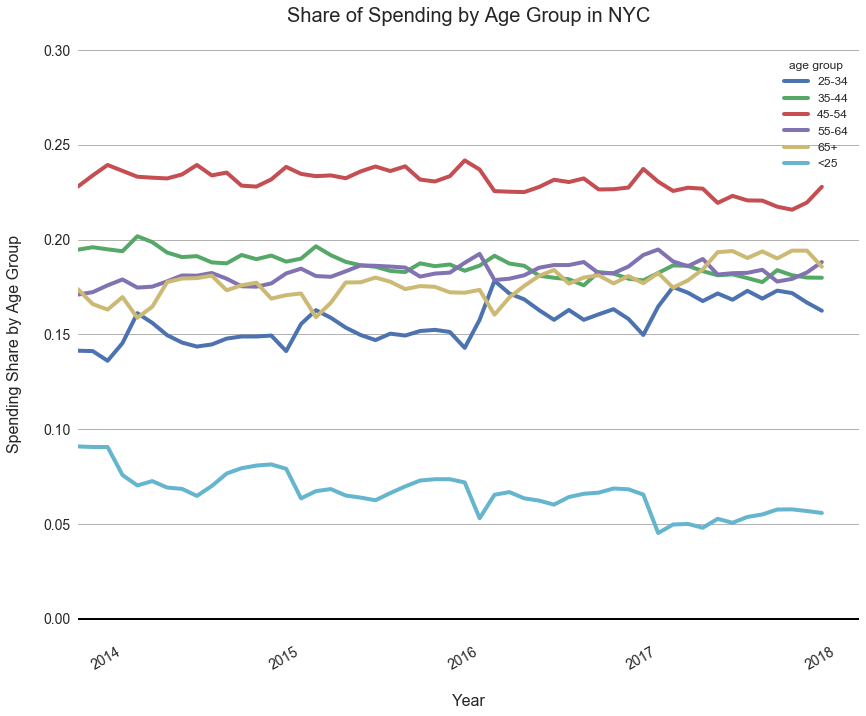

In [198]:
# creating the line chart
fig, ax = plt.subplots()

# plot
age_group['spend_share'].plot(ylim=(0,.3), figsize=(14,12), linewidth=4, legend=True, fontsize=14)

# making adjustments to the chart
ax.set_xlabel('\nYear', fontsize=16)
ax.set_ylabel('Spending Share by Age Group\n', fontsize=16)
ax.set_title('Share of Spending by Age Group in NYC\n', fontsize=20)
ax.tick_params(labelsize=14)
ax.set_ylim(-0.01, .30)
ax.set_xlim(nyc_age.index[0])
ax.grid(color='#b2b2b2', linestyle='-', linewidth=1)
ax.set_facecolor('white')
ax.xaxis.grid(False)
ax.axhline(linewidth=2, color="k")

#legend title font
lg = ax.legend(title='age group',fontsize=12, loc=1)
title = lg.get_title()
title.set_fontsize(12)

# tilting the date in the x axis
fig.autofmt_xdate()

# save fig
plt.savefig(fig_dir+'share_of_spending_by_age_group_in_nyc_over_time.png', dpi=300, bbox_inches='tight')

With respect to the chart above, it is worth noting that while <25 year olds have seen largest YOY growth and have been contributing to YOY growth in local New York commerce, their spending share is, interestingly, declining while there is an upward trend among 25-34 and 65+ over the four year period.

This is purely speculation, but I wonder if some folks who were <25 have crossed into the 25-34 year old bucket between 2013-2018, thus accouting for what seems to be a close relationship between declining commercial activity by <25 year olds and a rise in spending by 25-34. I'm curious why this has happened --> perhaps there was a bulge in <25 year olds prior to 2014 and that hasn't been replicated since? 

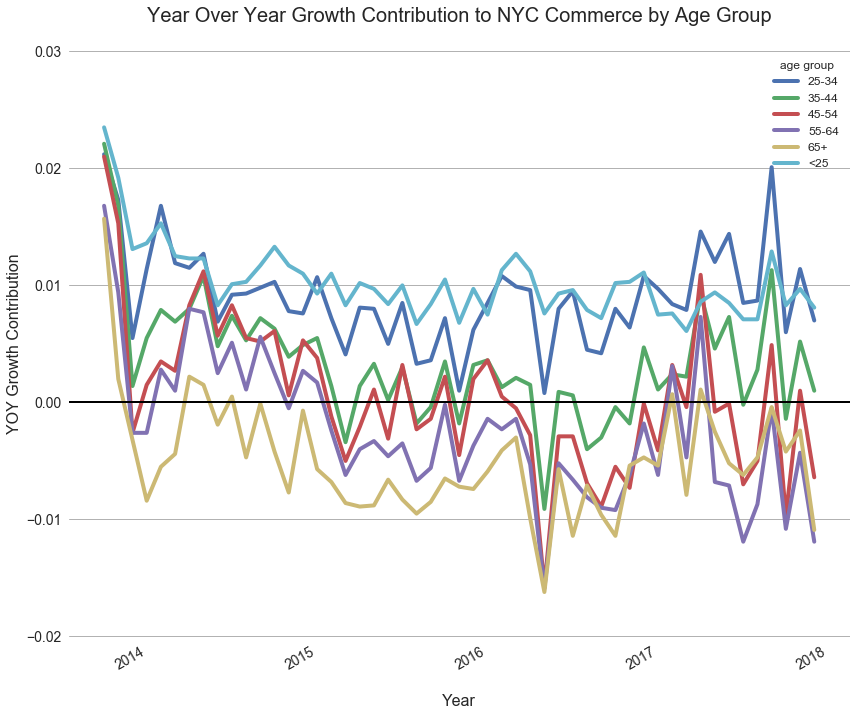

In [183]:
# chart on growth contribution

# creating the line chart
fig, ax = plt.subplots()

# plotting the growth contribution of the age groups in the groupy object 'age_group' 
age_group['growth_contribution'].plot(ylim=(0,.3), figsize=(14,12), linewidth=4, legend=True, fontsize=14)

# making adjustments to the chart
ax.set_xlabel('\nYear', fontsize=16)
ax.set_ylabel('YOY Growth Contribution', fontsize=16)
ax.set_title('Year Over Year Growth Contribution to NYC Commerce by Age Group\n', fontsize=20)
ax.tick_params(labelsize=14)
ax.set_ylim(-0.0201, .0301)
ax.grid(color='#b2b2b2', linestyle='-', linewidth=1)
ax.set_facecolor('white')
ax.xaxis.grid(False)
ax.axhline(linewidth=2, color="k")

#legend title font
lg = ax.legend(title='age group',fontsize=12, loc=1)
title = lg.get_title()
title.set_fontsize(12)

# tilting the date in the x axis
fig.autofmt_xdate()

So the above is interesting. For the most part, younger residents of New York seem to contribute more to YOY growth in local NYC commerce. 

Below, we'll look at the national level

In [87]:
# importing the full data set
national = pd.read_csv(path2)

national.head()

,periodid,area_name,dimname,category,growth_rate,spend_share,growth_contribution
0,201310,National,age,<25,0.1882,0.1011,0.0171
1,201310,National,age,25-34,0.0879,0.1491,0.0129
2,201310,National,age,35-44,0.0605,0.1978,0.0120
3,201310,National,age,45-54,0.0490,0.2128,0.0106
4,201310,National,age,55-64,0.0440,0.1675,0.0075


In [88]:
# as with nyc df, we'll shift the periodid column from int64 to datetime

national['periodid'] = pd.to_datetime(national['periodid'].astype(str), format = '%Y%m')

In [89]:
# creating a month and year column

national['month'] = national.periodid.dt.month
national['year'] = national.periodid.dt.year

In [90]:
# creating a string version of year-month

national['month'] = national['month'].astype(str)
national['year'] = national['year'].astype(str)
national['year-month'] = national['year'] + "-" + national['month']

In [91]:
# making the 'periodid' the index

national.set_index('periodid', inplace=True)

In [92]:
national.head()

,area_name,dimname,category,growth_rate,spend_share,growth_contribution,month,year,year-month
periodid,,,,,,,,,
2013-10-01,National,age,<25,0.1882,0.1011,0.0171,10,2013,2013-10
2013-10-01,National,age,25-34,0.0879,0.1491,0.0129,10,2013,2013-10
2013-10-01,National,age,35-44,0.0605,0.1978,0.0120,10,2013,2013-10
2013-10-01,National,age,45-54,0.0490,0.2128,0.0106,10,2013,2013-10
2013-10-01,National,age,55-64,0.0440,0.1675,0.0075,10,2013,2013-10


In [93]:
national['area_name'].unique()

array(['National', 'Houston, TX - Metro Area',
       'Portland, OR - Metro Area', 'Phoenix, AZ - Metro Area',
       'New York, NY - Metro Area', 'Dallas, TX - Metro Area',
       'Columbus, OH - Metro Area', 'San Diego, CA - Metro Area',
       'Denver, CO - Metro Area', 'Los Angeles, CA - Metro Area',
       'Miami, FL - Metro Area', 'San Francisco, CA - Metro Area',
       'Detroit, MI - Metro Area', 'Chicago, IL - Metro Area',
       'Atlanta, GA - Metro Area', 'Miami, FL - City',
       'Miami, FL - Outlying', 'Phoenix, AZ - City',
       'Phoenix, AZ - Outlying', 'Portland, OR - City',
       'Portland, OR - Outlying', 'New York, NY - Outlying',
       'New York, NY - City', 'Atlanta, GA - Outlying',
       'Atlanta, GA - City', 'Detroit, MI - Outlying',
       'Detroit, MI - City', 'Columbus, OH - City',
       'Columbus, OH - Outlying', 'Dallas, TX - City',
       'Dallas, TX - Outlying', 'San Diego, CA - Outlying',
       'San Diego, CA - City', 'Denver, CO - City',
       'D

In [94]:
# removing all the city-level data and just having national level
national = national[national['area_name']=='National']

In [95]:
# checking the dimensions
national['dimname'].unique()

array(['age', 'income', 'location', 'bizsize', 'product', 'Total'],
      dtype=object)

In [96]:
# right now we just want to check and plot age data
national_age = national[national['dimname'] == 'age']

In [97]:
# groupby object with the age groups at the national level
national_age_group = national_age.groupby('category')

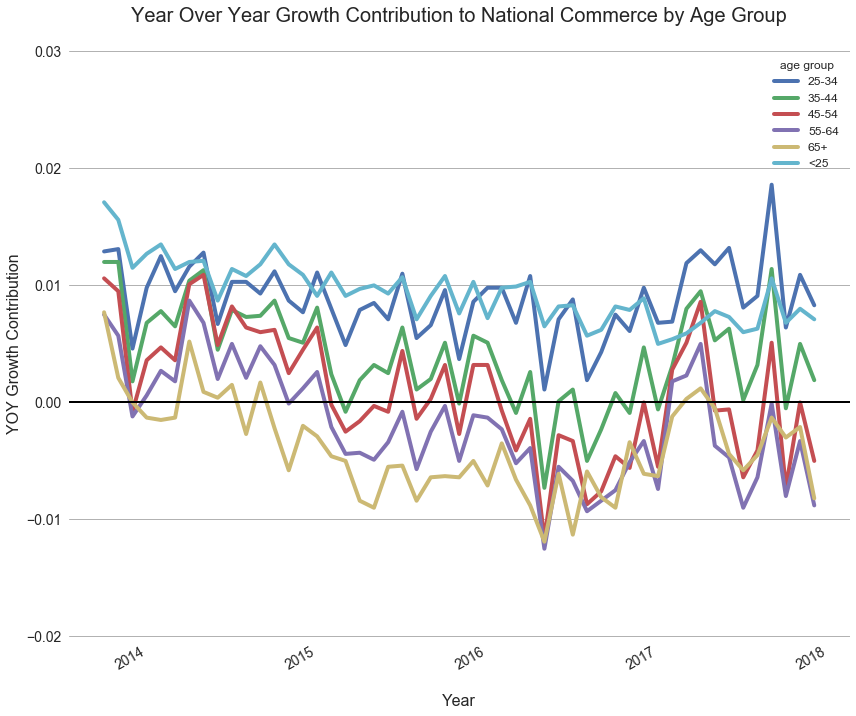

In [188]:
# chart on growth contribution at national (specifically from the cities listed a few cells above) level

# creating the line chart
fig, ax = plt.subplots()

# plotting the growth contribution of the age groups in the groupy object 'age_group' 
national_age_group['growth_contribution'].plot(ylim=(0,.3), figsize=(14,12), linewidth=4, legend=True, fontsize=14)

# making adjustments to the chart
ax.set_xlabel('\nYear', fontsize=16)
ax.set_ylabel('YOY Growth Contribution', fontsize=16)
ax.set_title('Year Over Year Growth Contribution to National Commerce by Age Group\n', fontsize=20)
ax.tick_params(labelsize=14)
ax.set_ylim(-0.0201, .0301)
ax.grid(color='#b2b2b2', linestyle='-', linewidth=1)
ax.set_facecolor('white')
ax.xaxis.grid(False)
ax.axhline(linewidth=2, color="k")

#legend title font
lg = ax.legend(title='age group',fontsize=12, loc=1)
title = lg.get_title()
title.set_fontsize(12)

# tilting the date in the x axis
fig.autofmt_xdate()

The chart above looks a lot like the corresponding chart for New York local commerce

### To create a different visual on the growth contributions to local commerce, we'll use bokeh below

In [29]:
# for starters, we'll collect the growth contributions by age group and assign them to variables
y1 = list(age_group.get_group('<25')['growth_contribution'])
y2 = list(age_group.get_group('25-34')['growth_contribution'])
y3 = list(age_group.get_group('35-44')['growth_contribution'])
y4 = list(age_group.get_group('45-54')['growth_contribution'])
y5 = list(age_group.get_group('55-64')['growth_contribution'])
y6 = list(age_group.get_group('65+')['growth_contribution'])

In [30]:
# since we're interested in a stacked bar with positive and negative values, we'll separate them

# function for to make array of positives and zeroes (in lieu of negatives)
# specifically, this will turn negatives into 0 and leave positives as is
def make_positive_list(var1):
    tmp_list = []
    for i in var1:
        if i < 0:
            i = 0
        else:
            i = i
        tmp_list.append(i)
    return tmp_list

# in contrast to above, we'll convert positives to zero and keep negatives as is
def make_negative_list(var2):
    tmp_list = []
    for i in var2:
        if i > 0:
            i = 0
        else:
            i = i
        tmp_list.append(i)
    return tmp_list

In [31]:
# creating respective lists of positive values for each age group
y1_positive = make_positive_list(y1) # <25
y2_positive = make_positive_list(y2) # 25-34
y3_positive = make_positive_list(y3) # and so on..
y4_positive = make_positive_list(y4)
y5_positive = make_positive_list(y5)
y6_positive = make_positive_list(y6)

# and the respective lists for negative values for each age group
y1_negative = make_negative_list(y1)
y2_negative = make_negative_list(y2)
y3_negative = make_negative_list(y3)
y4_negative = make_negative_list(y4)
y5_negative = make_negative_list(y5)
y6_negative = make_negative_list(y6)

In [43]:
# lastly, we want to multiply the figures in the array by 100 to get the percentage for the chart below

y1_positive = [i * 100 for i in y1_positive]
y2_positive = [i * 100 for i in y2_positive]
y3_positive = [i * 100 for i in y3_positive]
y4_positive = [i * 100 for i in y4_positive]
y5_positive = [i * 100 for i in y5_positive]
y6_positive = [i * 100 for i in y6_positive]

y1_negative = [i * 100 for i in y1_negative]
y2_negative = [i * 100 for i in y2_negative]
y3_negative = [i * 100 for i in y3_negative]
y4_negative = [i * 100 for i in y4_negative]
y5_negative = [i * 100 for i in y5_negative]
y6_negative = [i * 100 for i in y6_negative]

In [204]:
"""This will create a stacked bar chart using bokeh"""

# name of the file
output_file(fig_dir + "growth_contribution_by_age_group_in_nyc.html")

# setting the relevant variables
age_groups = ["<25", "25-34", "35-44", "45-54", "55-64", "65+"]
months = nyc['year-month'].unique()
colors = ["#3564f2", "#7496fc", "#b2c5ff", "#f48b2e", "#edb15c", "#efdec6"]

# creating a dictionary with the positive and negative lists made above
positives = {'months'  : months,
             '<25'     : y1_positive,
             '25-34'   : y2_positive,
             '35-44'   : y3_positive,
             '45-54'   : y4_positive,
             '55-64'   : y5_positive,
             '65+'     : y6_positive}
negatives = {'months'  : months,
             '<25'     : y1_negative,
             '25-34'   : y2_negative,
             '35-44'   : y3_negative,
             '45-54'   : y4_negative,
             '55-64'   : y5_negative,
             '65+'     : y6_negative}

# sources for the p variables below
source1 = ColumnDataSource(data=positives)
source2 = ColumnDataSource(data=negatives)

# bokeh figure
p = figure(y_range=months, plot_height=700, x_range=(-8.01,13.01), title="Commerce \
Growth Contribution by Age Group per Month in NYC", toolbar_location=None)

# positive stack
p.hbar_stack(age_groups, y='months', height=.7, color=colors, 
             source=source1, legend=["%s growth contribution" % x for x in age_groups])

# negative stack
p.hbar_stack(age_groups, y='months', height=.7, color=colors, 
             source=source2, legend=["%s growth contribution" % x for x in age_groups])


# plot layout
p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "center_right"
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = '\nPercent Growth Contribution'
p.yaxis.axis_label = 'Year-Month\n\n'
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

# Show the figure
bp.save(p)

# displaying the chart in the notebook
show_iframe(fig_dir+'growth_contribution_by_age_group_in_nyc.html', iwidth=650, iheight=450)

<iframe src=../figs/growth_contribution_by_age_group_in_nyc.html width=650 height=450></iframe>


## Shifting from age and taking a look at business size

In [74]:
set(nyc['dimname'])

{'Total', 'age', 'bizsize', 'income', 'location', 'product'}

In [99]:
# creating a df with just bizsize for nyc
nyc_bizsize = nyc[nyc['dimname'] == 'bizsize']

In [100]:
# creating a similar df for national data
national_bizsize = national[national['dimname'] == 'bizsize']

In [101]:
nyc_bizsize.groupby('category').agg(np.mean)

,growth_rate,spend_share,growth_contribution
category,,,
LARGE,0.004408,0.262331,0.000933
MEDIUM,0.012949,0.391704,0.004892
SMALL,0.030018,0.344686,0.010076


In [102]:
national_bizsize.groupby('category').agg(np.mean)

,growth_rate,spend_share,growth_contribution
category,,,
LARGE,0.016608,0.322373,0.005243
MEDIUM,0.012545,0.363604,0.004516
SMALL,0.025257,0.311645,0.007739


In [103]:
nyc_bizsize.head()

,area_name,dimname,category,growth_rate,spend_share,growth_contribution,month,year,year-month
periodid,,,,,,,,,
2013-10-01,"New York, NY - Metro Area",bizsize,LARGE,-0.0051,0.2506,-0.0014,10,2013,2013-10
2013-10-01,"New York, NY - Metro Area",bizsize,MEDIUM,0.1794,0.4006,0.0683,10,2013,2013-10
2013-10-01,"New York, NY - Metro Area",bizsize,SMALL,0.1584,0.3473,0.0532,10,2013,2013-10
2013-11-01,"New York, NY - Metro Area",bizsize,LARGE,0.0283,0.2844,0.0084,11,2013,2013-11
2013-11-01,"New York, NY - Metro Area",bizsize,MEDIUM,0.0952,0.3906,0.0367,11,2013,2013-11


In [109]:
# creating a group for the plot in the cell below
nyc_biz_group = nyc_bizsize.groupby('category')

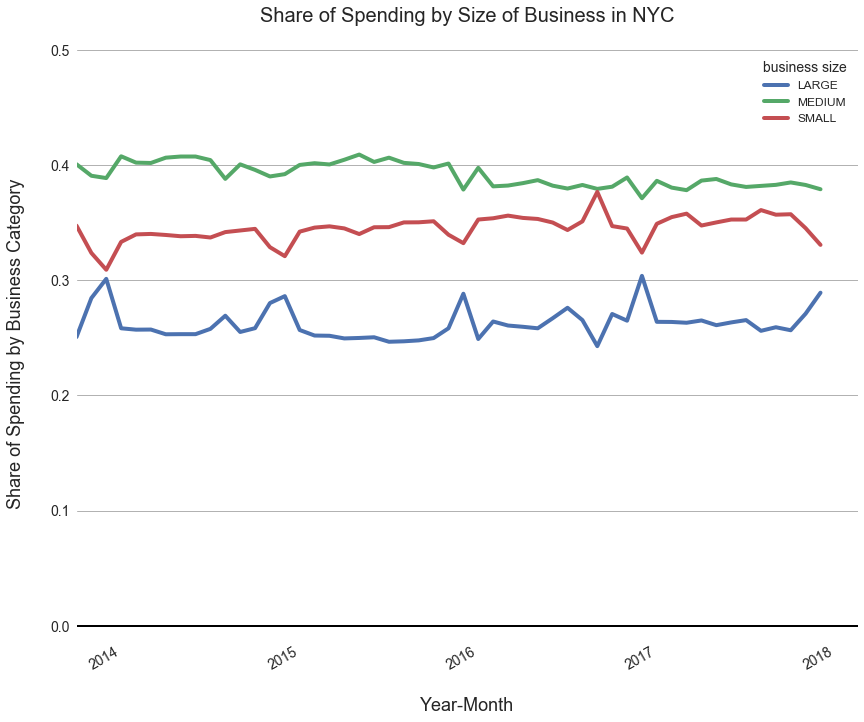

In [197]:
# creating the line chart
fig, ax = plt.subplots()

# plot
nyc_biz_group['spend_share'].plot(ylim=(0,.3), figsize=(14,12), linewidth=4, legend=True, fontsize=14)

# setting and labeling the axes
ax.set_xlabel('\nYear-Month', fontsize=18)
ax.set_ylabel('Share of Spending by Business Category\n', fontsize=18)
ax.set_title('Share of Spending by Size of Business in NYC\n', fontsize=20)
ax.tick_params(labelsize=14)
ax.set_ylim(-0.01, .50)
ax.set_xlim(nyc_bizsize.index[0])
ax.grid(color='#b2b2b2', linestyle='-', linewidth=1)
ax.set_facecolor('white')
ax.xaxis.grid(False)
ax.axhline(linewidth=2, color='k')

#legend
lg = ax.legend(title='business size',fontsize=12, loc=1)
title = lg.get_title()
title.set_fontsize(14)

# tilting the date in the x axis
fig.autofmt_xdate()

# save fig
plt.savefig(fig_dir+'share_of_spending_by_size_of_business_over_time_in_NYC.png', dpi=300, bbox_inches='tight')

In [106]:
# creating a national group for the plot in the cell below
national_biz_group = national_bizsize.groupby('category')

In [107]:
national_biz_group.agg(np.mean)

,growth_rate,spend_share,growth_contribution
category,,,
LARGE,0.016608,0.322373,0.005243
MEDIUM,0.012545,0.363604,0.004516
SMALL,0.025257,0.311645,0.007739


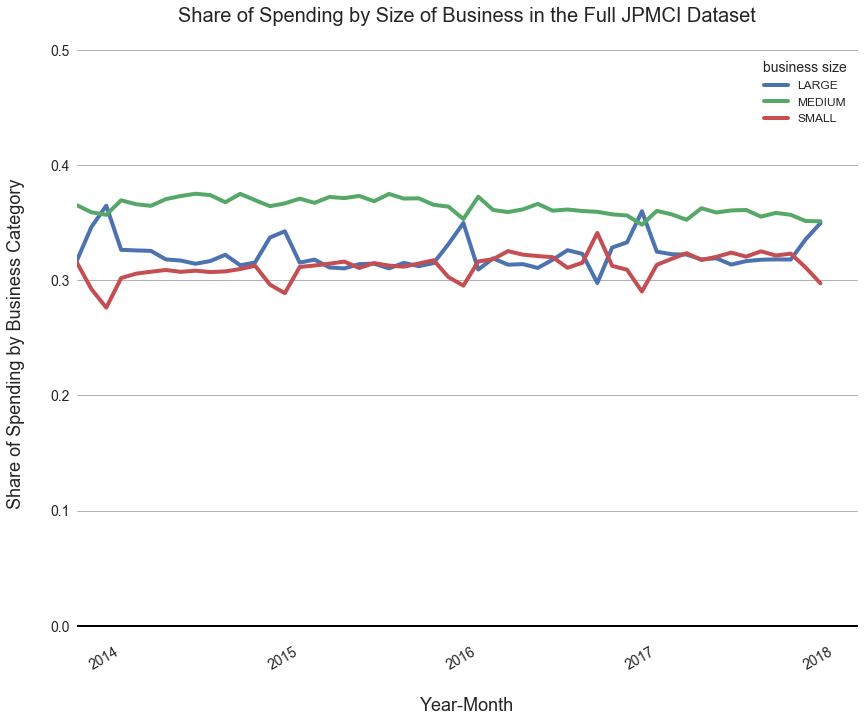

In [200]:
# creating the line chart
fig, ax = plt.subplots()

# plot
national_biz_group['spend_share'].plot(ylim=(0,.3), figsize=(14,12), linewidth=4, legend=True, fontsize=14)

# setting and labeling the axes
ax.set_xlabel('\nYear-Month', fontsize=18)
ax.set_ylabel('Share of Spending by Business Category\n', fontsize=18)
ax.set_title('Share of Spending by Size of Business in the Full JPMCI Dataset\n', fontsize=20)
ax.tick_params(labelsize=14)
ax.set_ylim(-0.01, .50)
ax.set_xlim(national_bizsize.index[0])
ax.grid(color='#b2b2b2', linestyle='-', linewidth=1)
ax.set_facecolor('white')
ax.xaxis.grid(False)
ax.axhline(linewidth=2, color='k')

#legend
lg = ax.legend(title='business size',fontsize=12, loc=1)
title = lg.get_title()
title.set_fontsize(14)

# tilting the date in the x axis
fig.autofmt_xdate()

# save fig
plt.savefig(fig_dir+'share_of_spending_by_size_of_business_over_time_in_full_dataset.png', dpi=300, bbox_inches='tight')

I'd be curious to see what the growth contribution is by business size at the national level

### bokeh plots of large, medium, and small business at the national and NYC level
    

Starting with the NYC level data

In [114]:
# beginning with the lists of growth contributions by biz size and assign them to variables
ny1 = list(nyc_biz_group.get_group('SMALL')['growth_contribution'])
ny2 = list(nyc_biz_group.get_group('MEDIUM')['growth_contribution'])
ny3 = list(nyc_biz_group.get_group('LARGE')['growth_contribution'])

In [119]:
# creating respective lists of positive values for each age group
ny1_positive = make_positive_list(ny1) # SMALL
ny2_positive = make_positive_list(ny2) # MEDIUM
ny3_positive = make_positive_list(ny3) # LARGE

# and the respective lists for negative values for each age group
ny1_negative = make_negative_list(ny1)
ny2_negative = make_negative_list(ny2)
ny3_negative = make_negative_list(ny3)

In [120]:
# lastly, we want to multiply the figures in the array by 100 to get the percentage for the chart below

ny1_positive = [i * 100 for i in ny1_positive]
ny2_positive = [i * 100 for i in ny2_positive]
ny3_positive = [i * 100 for i in ny3_positive]

ny1_negative = [i * 100 for i in ny1_negative]
ny2_negative = [i * 100 for i in ny2_negative]
ny3_negative = [i * 100 for i in ny3_negative]

In [202]:
"""This will create a stacked bar chart using bokeh"""

# name of the file
output_file(fig_dir + "growth_contribution_by_biz_size_in_nyc.html")

# setting the relevant variables
biz_size = ["SMALL", "MEDIUM", "LARGE"]
months = nyc_bizsize['year-month'].unique()
colors = ["#ff9c51", "#5b78d8", "#9ac4f9"]  

# creating a dictionary with the positive and negative lists made above
positives = {'months'  : months,
             'SMALL'   : ny1_positive,
             'MEDIUM'  : ny2_positive,
             'LARGE'   : ny3_positive}
negatives = {'months'  : months,
             'SMALL'   : ny1_negative,
             'MEDIUM'  : ny2_negative,
             'LARGE'   : ny3_negative}

# sources for the p variables below
source1 = ColumnDataSource(data=positives)
source2 = ColumnDataSource(data=negatives)

# bokeh figure
p = figure(y_range=months, plot_height=700, x_range=(-6.51,15.5), title="Commerce \
Growth Contribution by Business Size per Month in NYC", toolbar_location=None)

# positive stack
p.hbar_stack(biz_size, y='months', height=.7, color=colors, 
             source=source1, legend=["%s growth contribution" % x for x in biz_size])

# negative stack
p.hbar_stack(biz_size, y='months', height=.7, color=colors, 
             source=source2, legend=["%s growth contribution" % x for x in biz_size])


# plot layout
p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "center_right"
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = '\nPercent Growth Contribution'
p.yaxis.axis_label = 'Year-Month\n\n'
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

# Show the figure
bp.save(p)

# displaying the chart in the notebook
show_iframe(fig_dir+'growth_contribution_by_biz_size_in_nyc.html', iwidth=650, iheight=450)

<iframe src=../figs/growth_contribution_by_biz_size_in_nyc.html width=650 height=450></iframe>


Moving on to national data

In [171]:
national_bizsize['year-month'].unique()

array(['2013-10', '2013-11', '2013-12', '2014-1', '2014-2', '2014-3',
       '2014-4', '2014-5', '2014-6', '2014-7', '2014-8', '2014-9',
       '2014-10', '2014-11', '2014-12', '2015-1', '2015-2', '2015-3',
       '2015-4', '2015-5', '2015-6', '2015-7', '2015-8', '2015-9',
       '2015-10', '2015-11', '2015-12', '2016-1', '2016-2', '2016-3',
       '2016-4', '2016-5', '2016-6', '2016-7', '2016-8', '2016-9',
       '2016-10', '2016-11', '2016-12', '2017-1', '2017-2', '2017-3',
       '2017-4', '2017-5', '2017-6', '2017-7', '2017-8', '2017-9',
       '2017-10', '2017-11', '2017-12'], dtype=object)

In [168]:
# beginning with the lists of growth contributions by biz size and assign them to variables
nat1 = list(national_biz_group.get_group('SMALL')['growth_contribution'])
nat2 = list(national_biz_group.get_group('MEDIUM')['growth_contribution'])
nat3 = list(national_biz_group.get_group('LARGE')['growth_contribution'])

In [169]:
# creating respective lists of positive values for each age group
nat1_positive = make_positive_list(nat1) # SMALL
nat2_positive = make_positive_list(nat2) # MEDIUM
nat3_positive = make_positive_list(nat3) # LARGE

# and the respective lists for negative values for each age group
nat1_negative = make_negative_list(nat1)
nat2_negative = make_negative_list(nat2)
nat3_negative = make_negative_list(nat3)

In [170]:
# lastly, we want to multiply the figures in the array by 100 to get the percentage for the chart below

nat1_positive = [i * 100 for i in nat1_positive]
nat2_positive = [i * 100 for i in nat2_positive]
nat3_positive = [i * 100 for i in nat3_positive]

nat1_negative = [i * 100 for i in nat1_negative]
nat2_negative = [i * 100 for i in nat2_negative]
nat3_negative = [i * 100 for i in nat3_negative]

In [203]:
"""This will create a stacked bar chart using bokeh"""

# name of the file
output_file(fig_dir + "growth_contribution_by_biz_size_national.html")

# setting the relevant variables
biz_size = ["SMALL", "MEDIUM", "LARGE"]
months = national_bizsize['year-month'].unique()
colors = ["#ff9c51", "#5b78d8", "#9ac4f9"]  

# creating a dictionary with the positive and negative lists made above
positives = {'months'  : months,
             'SMALL'   : nat1_positive,
             'MEDIUM'  : nat2_positive,
             'LARGE'   : nat3_positive}
negatives = {'months'  : months,
             'SMALL'   : nat1_negative,
             'MEDIUM'  : nat2_negative,
             'LARGE'   : nat3_negative}

# sources for the p variables below
source1 = ColumnDataSource(data=positives)
source2 = ColumnDataSource(data=negatives)

# bokeh figure
p = figure(y_range=months, plot_height=700, x_range=(-6.51,15.5), title="Commerce \
Growth Contribution by Business Size per Month in Full JPMCI Dataset", toolbar_location=None)

# positive stack
p.hbar_stack(biz_size, y='months', height=.7, color=colors, 
             source=source1, legend=["%s growth contribution" % x for x in biz_size])

# negative stack
p.hbar_stack(biz_size, y='months', height=.7, color=colors, 
             source=source2, legend=["%s growth contribution" % x for x in biz_size])


# plot layout
p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "center_right"
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = '\nPercent Growth Contribution'
p.yaxis.axis_label = 'Year-Month\n\n'
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

# Show the figure
bp.save(p)

# displaying the chart in the notebook
show_iframe(fig_dir+'growth_contribution_by_biz_size_national.html', iwidth=650, iheight=450)

<iframe src=../figs/growth_contribution_by_biz_size_national.html width=650 height=450></iframe>
